In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [5]:
df=pd.read_csv("C:/Users/kakis/Downloads/daily_cp_activity_dataset.csv")

In [6]:
print(df.head())

         date  courier_partners_online  temperature  relative_humidity  \
0  2021-05-01                       49        18.27               0.57   
1  2021-05-02                      927        19.88               0.55   
2  2021-05-03                       40        16.88               0.60   
3  2021-05-04                       51        21.88               0.53   
4  2021-05-05                       50        21.11               0.54   

   precipitation  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [19]:
nan_columns=[]
for column in df.columns:
    if df[column].isnull().any():
        nan_columns.append(column)
print(nan_columns)
# it was temperature,precipitation

[]


In [8]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

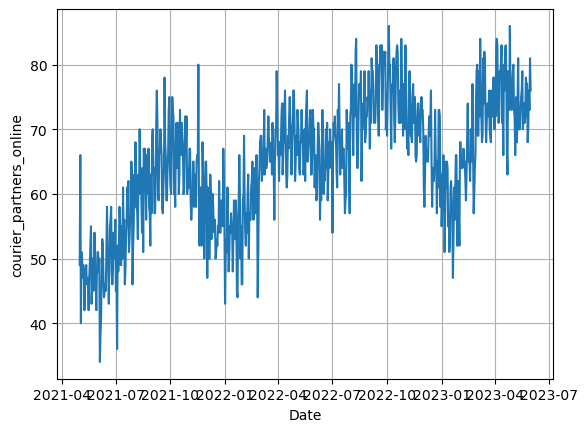

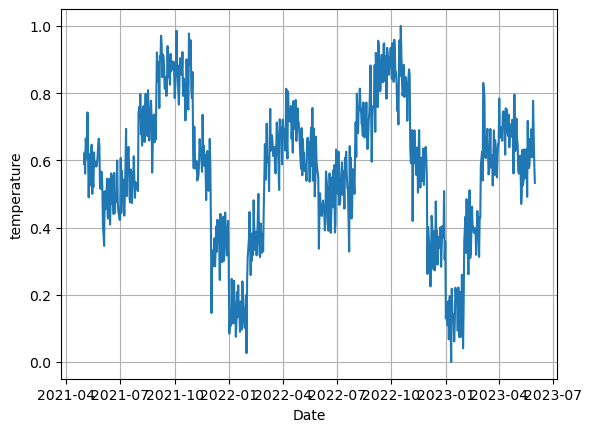

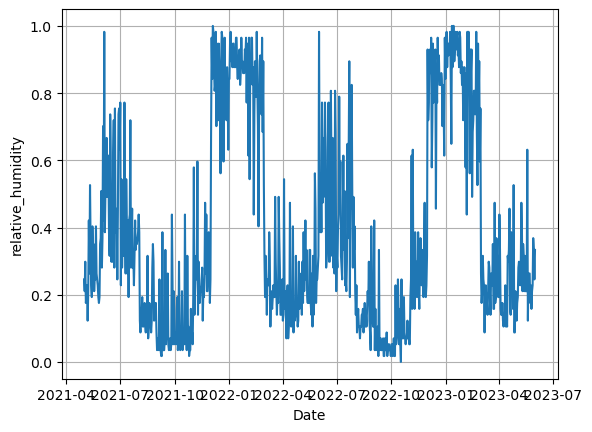

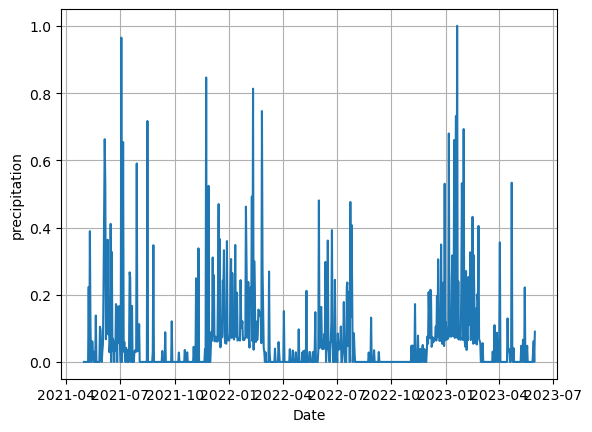

In [16]:
for column in df.columns:
    if column!='date':
        plt.plot(df.index,df[column])
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()

In [10]:
df_test= df['temperature'].interpolate(method='linear', limit_direction='both') 
#i will use this for temperature

In [11]:
outliers_courier=df['courier_partners_online'].nlargest(5).index
median_courier=df['courier_partners_online'].median()
for index in outliers_courier:
    df.at[index,'courier_partners_online']=median_courier

print(df['courier_partners_online'].head(10))

date
2021-05-01    49
2021-05-02    66
2021-05-03    40
2021-05-04    51
2021-05-05    50
2021-05-06    47
2021-05-07    49
2021-05-08    48
2021-05-09    42
2021-05-10    48
Name: courier_partners_online, dtype: int64


In [12]:
df['temperature'].interpolate(method='linear', limit_direction='both', inplace=True)


In [13]:
spearman_corr = df[['courier_partners_online', 'temperature','relative_humidity','precipitation']].corr(method='spearman')
print(spearman_corr)

                         courier_partners_online  temperature  \
courier_partners_online                 1.000000     0.525603   
temperature                             0.525603     1.000000   
relative_humidity                      -0.507162    -0.927405   
precipitation                          -0.486561    -0.774197   

                         relative_humidity  precipitation  
courier_partners_online          -0.507162      -0.486561  
temperature                      -0.927405      -0.774197  
relative_humidity                 1.000000       0.857028  
precipitation                     0.857028       1.000000  


In [14]:
median_precipitation=df['precipitation'].median()
df['precipitation'].fillna(median_precipitation,inplace=True)

In [17]:
scaler=MinMaxScaler()
columns_to_scale = ['temperature', 'precipitation','relative_humidity']
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])

            courier_partners_online  temperature  relative_humidity  \
date                                                                  
2021-05-01                       49     0.589401           0.245614   
2021-05-02                       66     0.622992           0.210526   
2021-05-03                       40     0.560401           0.298246   
2021-05-04                       51     0.664719           0.175439   
2021-05-05                       50     0.648654           0.192982   
2021-05-06                       47     0.605466           0.228070   
2021-05-07                       49     0.742541           0.122807   
2021-05-08                       48     0.626330           0.210526   
2021-05-09                       42     0.489672           0.421053   
2021-05-10                       48     0.575214           0.263158   
2021-05-11                       48     0.618402           0.526316   
2021-05-12                       49     0.525558           0.350877   
2021-0